## Import Data

In [40]:
import gzip
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [41]:
DATA_PATH = os.path.join("data", "processed", "phoenixweather2014t")

try:
    with gzip.open(os.path.join(DATA_PATH, 'phoenix14t.pami0.train.annotations_only.gzip'), "rb") as f:
        annotations = pickle.load(f)
except:
    print("Error: Invalid path")

### Convert to Pandas DataFrame

In [43]:
VIDEO_PATH = os.path.join(DATA_PATH, "videos_phoenix", "videos")
names = list(
    map(
        lambda x: os.path.join(VIDEO_PATH, *x.split("/")) + ".mp4",
        [key["name"] for key in annotations],
    )
)
glosses = [key["gloss"] for key in annotations]
texts = [key["text"] for key in annotations]

data = {"names": names, "glosses": glosses, "texts": texts}

df = pd.DataFrame(data)


## First Five Samples

In [44]:
print(df.head(5))

                                               names  \
0  data\processed\phoenixweather2014t\videos_phoe...   
1  data\processed\phoenixweather2014t\videos_phoe...   
2  data\processed\phoenixweather2014t\videos_phoe...   
3  data\processed\phoenixweather2014t\videos_phoe...   
4  data\processed\phoenixweather2014t\videos_phoe...   

                                             glosses  \
0      JETZT WETTER MORGEN DONNERSTAG ZWOELF FEBRUAR   
1  ORT REGEN DURCH REGEN KOENNEN UEBERSCHWEMMUNG ...   
2  NORDWEST HEUTE NACHT TROCKEN BLEIBEN SUEDWEST ...   
3  TAGSUEBER OFT REGEN GEWITTER KOENNEN MANCHMAL ...   
4                       WOLKE LOCH SPEZIELL NORDWEST   

                                               texts  
0  und nun die wettervorhersage für morgen donner...  
1  mancherorts regnet es auch länger und ergiebig...  
2  im nordwesten bleibt es heute nacht meist troc...  
3  auch am tag gibt es verbreitet zum teil kräfti...  
4  größere wolkenlücken finden sich vor allem im ..

In [45]:
df.describe()

,names,glosses,texts
count,7096,7096,7096
unique,7096,6900,6853
top,data\processed\phoenixweather2014t\videos_phoe...,SCHOEN ABEND TSCHUESS,guten abend liebe zuschauer .
freq,1,22,63


## Gloss and Text Univariate Analysis

In [58]:
gloss_lengths_count = Counter(list(map(lambda x: len(x.split()), list(df['glosses']))))
text_lengths_count = Counter(list(map(lambda x: len(x.split()), list(df['texts']))))

In [82]:
gloss_counts = pd.DataFrame(list(map(lambda x: len(x.split()), list(df['glosses'])))).rename(columns={0: 'Gloss Lengths'})
text_counts = pd.DataFrame(list(map(lambda x: len(x.split()), list(df['texts'])))).rename(columns={0: 'Text Lengths'})


display(text_counts.describe(include='all'))
display(gloss_counts.describe(include='all'))

,Text Lengths
count,7096.000000
mean,14.962937
std,5.983502
min,2.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,53.000000


,Gloss Lengths
count,7096.000000
mean,7.785654
std,3.436425
min,1.000000
25%,5.000000
50%,7.000000
75%,10.000000
max,30.000000


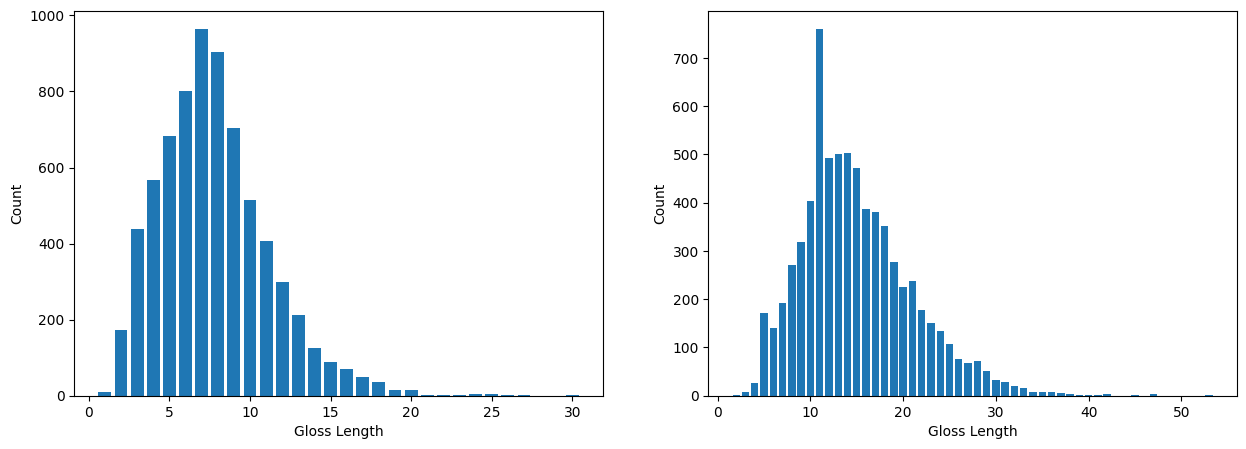

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))

axis[0].bar(gloss_lengths_count.keys(), gloss_lengths_count.values())
axis[0].set_title('Glosses')
axis[0].set_xlabel("Gloss Length")
axis[0].set_ylabel("Count")

axis[1].bar(text_lengths_count.keys(), text_lengths_count.values())
axis[1].set_title('Texts')
axis[1].set_xlabel("Gloss Length")
axis[1].set_ylabel("Count")
plt.show()

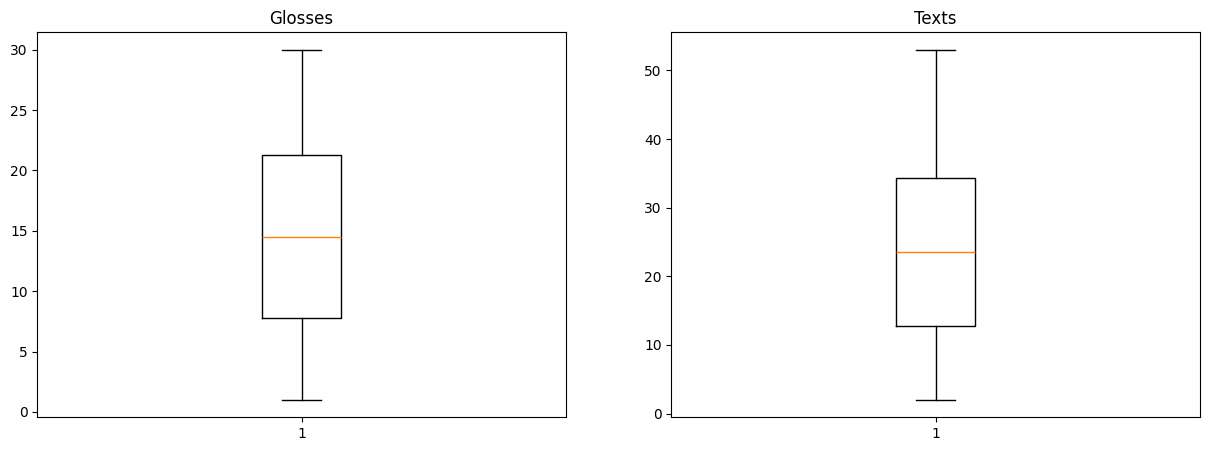

In [85]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))

axis[0].boxplot(gloss_lengths_count.keys())
axis[0].set_title("Glosses")

axis[1].boxplot(text_lengths_count.keys())
axis[1].set_title("Texts")

plt.show()